In [2]:
#Im on my own so I dont see the point, since im doing all the work and creating all the files its not like anyone but me 
#will be creating or manipulating data so i can just copy paste things
#I understand method chaining however I dont feel the need to put it in its own place becaus eno one else needs to use it
#Within my processed folder I have chain methods to help me further analyze the data so its fine I just copied to scripts

In [22]:
import os
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [29]:
#So nothing works. Im just going to do all my analysis for this here with some method chaining.


In [30]:
def genre():
    df=(
        pd.read_csv('/Users/brendanmichaud/Desktop/Year3/301/course-project-group_112/data/raw/Spotify-2000.csv')
        .sort_values(['Artist','Top Genre','Year'],ascending=True)
        .drop(columns=['Index'])
    )
    return df

In [31]:
def popular():
    df = (
        pd.read_csv('/Users/brendanmichaud/Desktop/Year3/301/course-project-group_112/data/raw/Spotify-2000.csv')
        .sort_values('Popularity',ascending=False)
    )
    df2 = (
        df
        .drop(columns=['Energy','Valence','Acousticness','Speechiness','Beats Per Minute (BPM)','Loudness (dB)','Length (Duration)'])
    )
    return df2

In [32]:
def year():
    df=(
        pd.read_csv('/Users/brendanmichaud/Desktop/Year3/301/course-project-group_112/data/raw/Spotify-2000.csv')
        .sort_values(['Year','Popularity'],ascending=False)
        
        .drop(columns=['Index'])
    )
    return df

In [34]:
#these are the most popular songs(top 20% because its so large)
def mostpop():
    df=(
        pd.read_csv('/Users/brendanmichaud/Desktop/Year3/301/course-project-group_112/data/raw/Spotify-2000.csv')
        .sort_values(['Popularity'],ascending=False)
        
        .drop(columns=['Index'])
    )
    indexNames = df[df['Popularity'] < 80 ].index
    df.drop(indexNames , inplace=True)
    return df

#this method is for the least popular songs (bottom 25%)
def leastpop():
    df=(
        pd.read_csv('/Users/brendanmichaud/Desktop/Year3/301/course-project-group_112/data/raw/Spotify-2000.csv')
        .sort_values(['Popularity'],ascending=True)
        .drop(columns=['Index'])
    )
    indexNames = df[df['Popularity'] > 25 ].index
    df.drop(indexNames , inplace=True)
    return df

In [35]:
#Combine Title and Artist for Clarity
df2=mostpop()
df2['Title_Artist']="["+df2['Artist']+"] "+df2['Title']

In [36]:
#Same as before but for the least popular songs
df3=leastpop()
df3['Title_Artist']="["+df3['Artist']+"] "+df3['Title']

In [ ]:
#too many data points for pandas plot
years=[2000,2002,2004,2006,2008,2010,2012,2014,2016,2018]
newage=df.plot.scatter(x='Year',y='Artist',figsize=(16,10),xticks=years)
newage.set_xlim(2000,2019)
newage

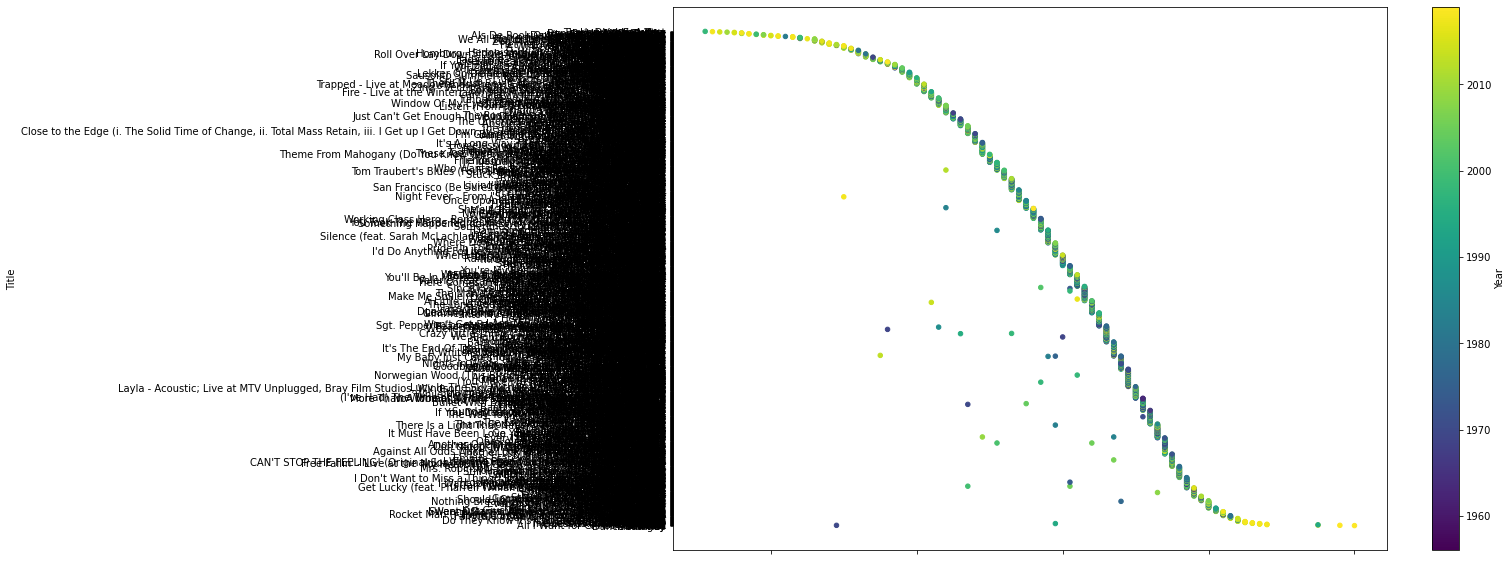

In [38]:
#still too hard to see, ill need to filter more
newpop= popular().plot.scatter(y='Title',x='Popularity',c='Year',figsize=(16,10),colormap='viridis')

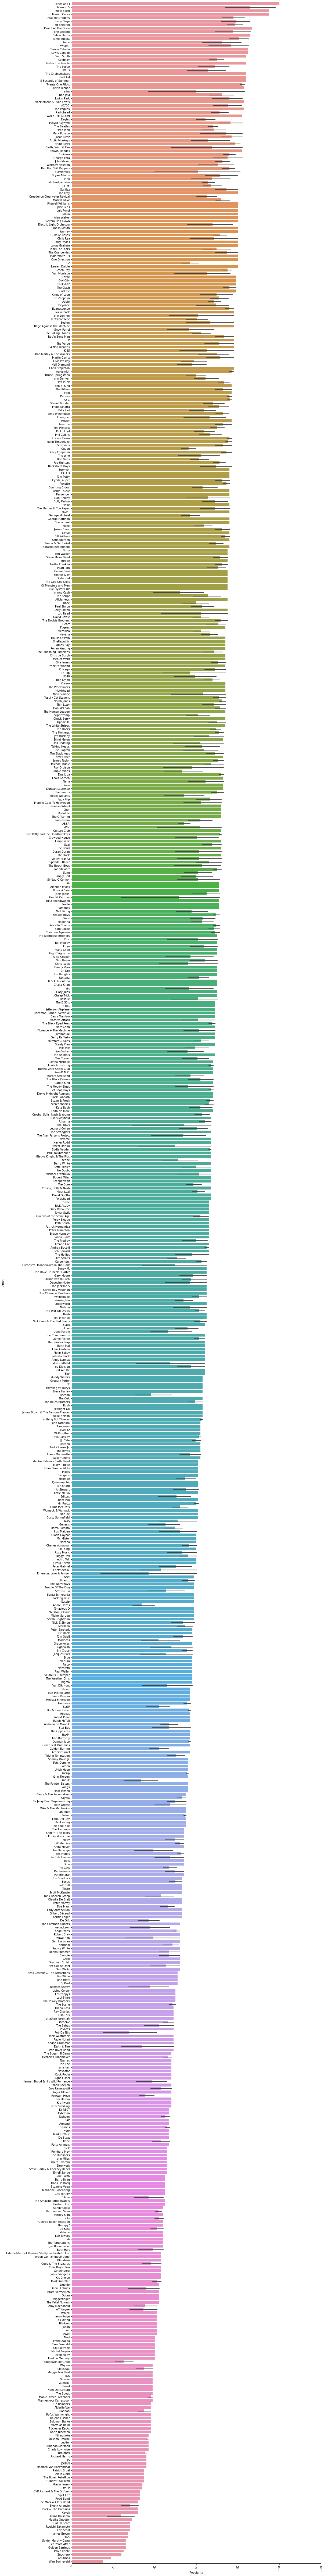

In [39]:
#I want to see how many artists there are and how to cut this dataset down to size. So first I'll need to see how many there are
pop2=sns.catplot(data=popular(),y='Artist',x='Popularity',kind='bar')
pop2.fig.set_figwidth(50)
pop2.fig.set_figheight(150)
pop2.set_xticklabels(rotation=90)

/Users/brendanmichaud/opt/miniconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)


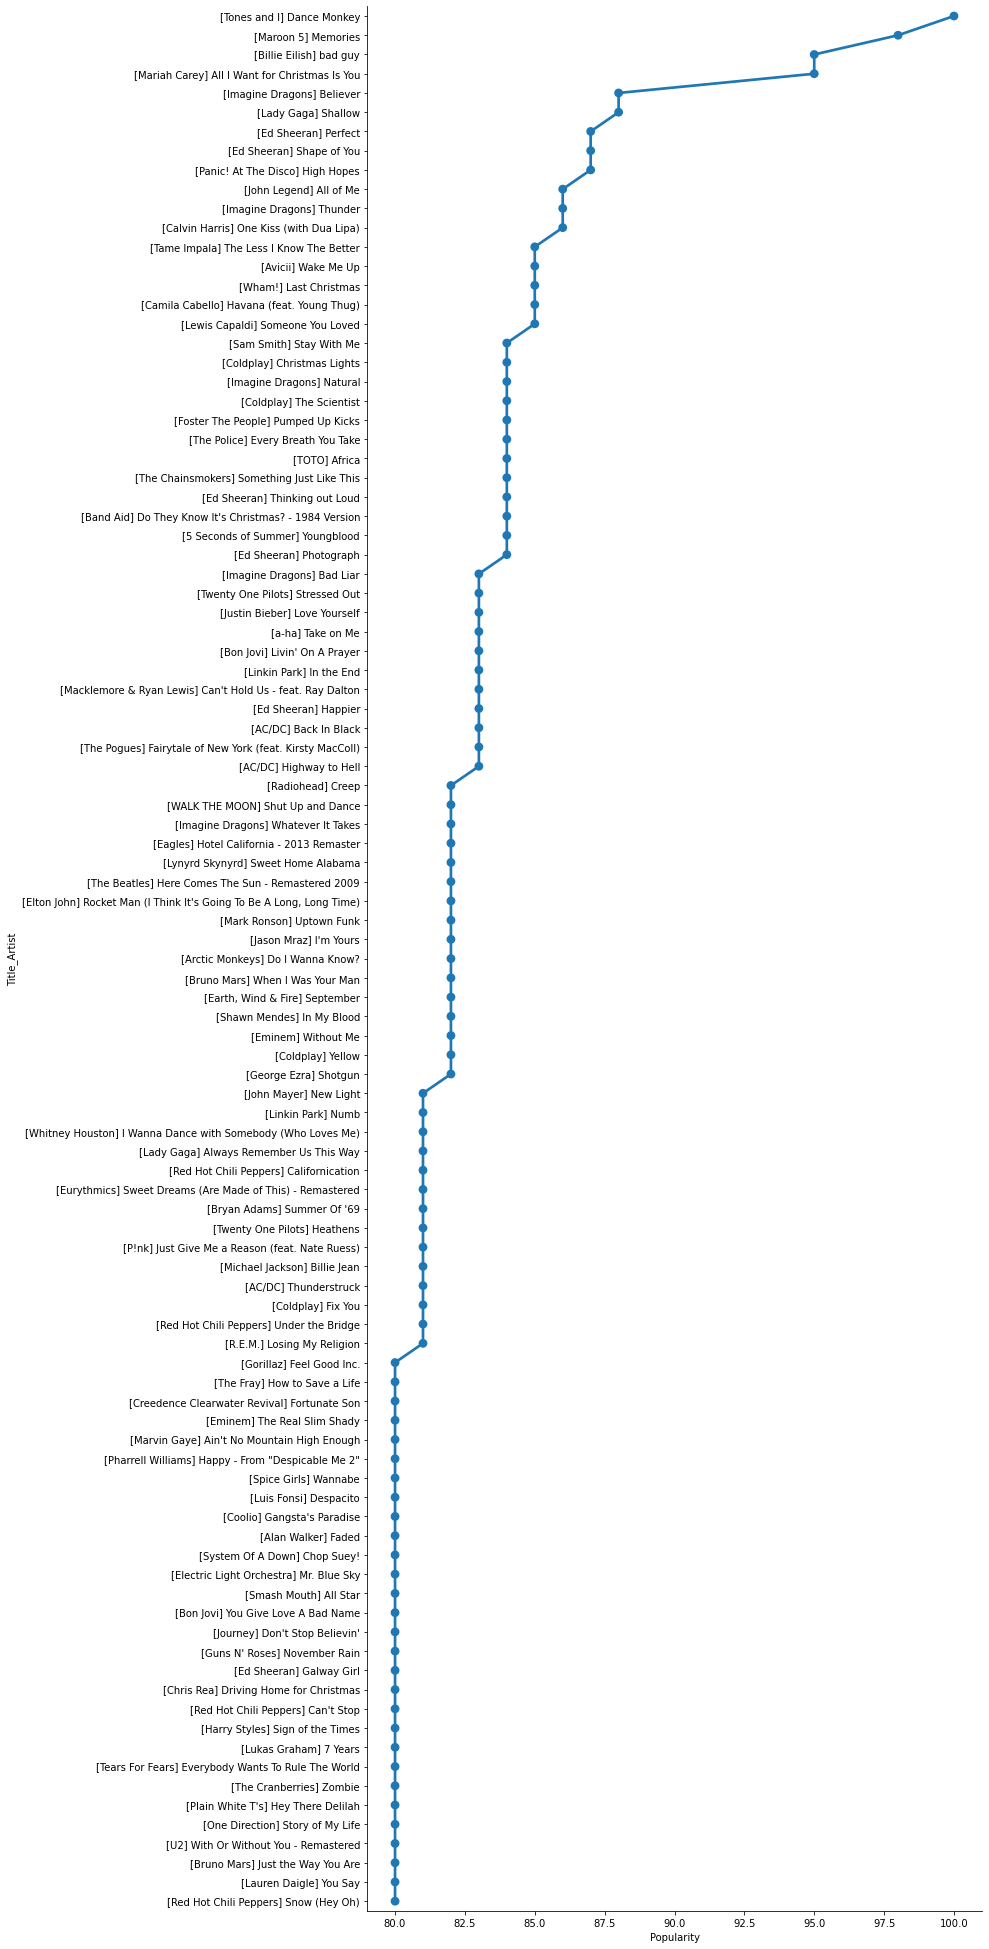

In [40]:
#Lets find the most popular Songs first
pop2=sns.catplot(data=df2,y='Title_Artist',x='Popularity',kind='point')
pop2.fig.set_figwidth(10)
pop2.fig.set_figheight(30)

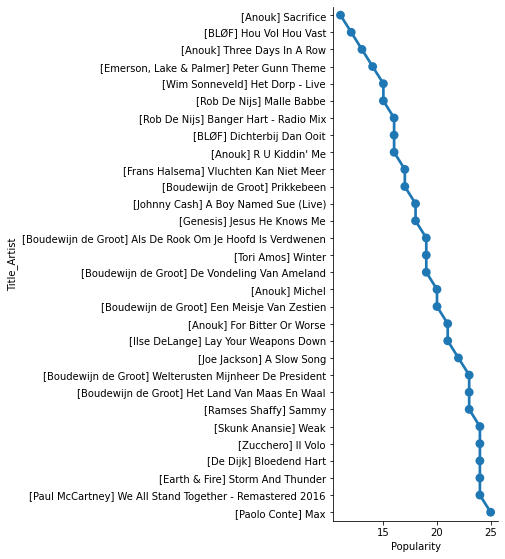

In [41]:
#Now lets look at the least popular songs out there
lpop=sns.catplot(data=df3,y='Title_Artist',x='Popularity',kind='point')
lpop.fig.set_figwidth(30)
lpop.fig.set_figheight(8)

In [ ]:
#Time to look at the genre column

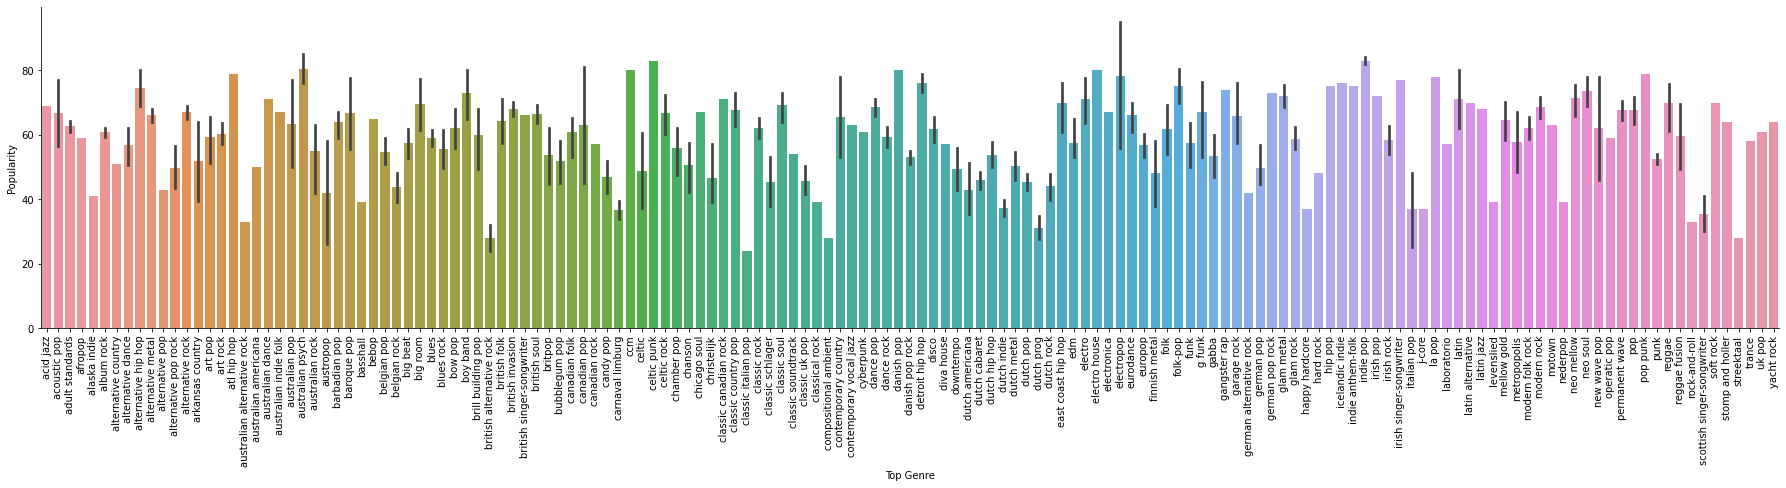

In [42]:
#Turns out there are far too many genres... Ill have to clean this up, for my analysis and final export.
popGen=sns.catplot(data=popular().sort_values('Top Genre'),x='Top Genre',y='Popularity',aspect=5,kind='bar')
popGen.set_xticklabels(rotation=90)

In [171]:
#I CANNOT GET THE PORT OVER RIGHT SO I WILL NOT BE IMPORTING, INSTEAD I WILL JUST WRITE THAT CODE HERE

def main():
    
    d1=popular()
    d1['Genre']=""
    #combine sub-genres
    for i,r in d1.iterrows():
        #Manually sorted each genre so theres 13 instead of 137
        if(r['Top Genre'].find('pop')!=-1):
            d1.at[i,'Top Genre']='Pop'
        elif(r['Top Genre'].find('metal')!=-1):
            d1.at[i,'Top Genre']='Metal'
        elif(r['Top Genre'].find('alternative')!=-1):
            d1.at[i,'Top Genre']='Alternative'
        elif(r['Top Genre'].find('rock')!=-1):
            d1.at[i,'Top Genre']='Rock'
        elif(r['Top Genre'].find('country')!=-1):
            d1.at[i,'Top Genre']='Country'
        elif(r['Top Genre'].find('jazz')!=-1):
            d1.at[i,'Top Genre']='Jazz'
        elif(r['Top Genre'].find('soul')!=-1):
            d1.at[i,'Top Genre']='Soul'
        elif(r['Top Genre'].find('hip')!=-1):
            d1.at[i,'Top Genre']='Hip Hop'
        elif(r['Top Genre'].find('rap')!=-1):
            d1.at[i,'Top Genre']='Hip Hop'
        elif(r['Top Genre'].find('house')!=-1):
            d1.at[i,'Top Genre']='House'
        elif(r['Top Genre'].find('adult')!=-1):
            d1.at[i,'Top Genre']='Adult Standard'
        elif(r['Top Genre'].find('dutch')!=-1):
            d1.at[i,'Top Genre']='Dutch'
        else:
            d1.at[i,'Genre']=r['Top Genre'] #Store the Other genres in its own column so theyre not deleted entirely
            d1.at[i,'Top Genre']='Other' #Too many genres so ill group the lesser ones together
    
    return d1

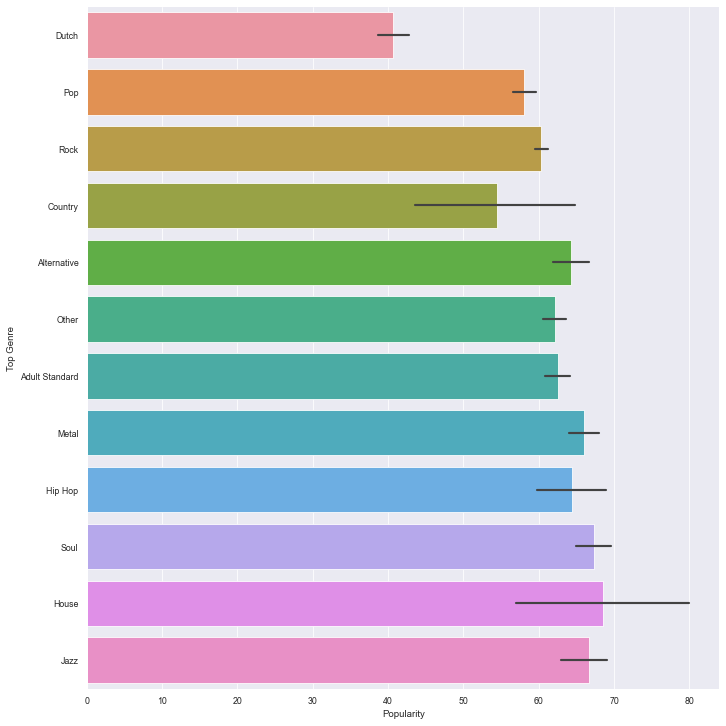

In [172]:
#So we can see the data is now easier to see and songs are in more general categories. Easier for research.
sns.catplot(data=main().sort_values('Popularity'),x='Popularity',y='Top Genre',kind='bar',height=10)

In [ ]:
#THIS IS NOW THE MAIN ANALYSIS

In [173]:
#Im gonna create dataframes of each genre so I can see them individually.
adu=main()
indexNames = adu[adu['Top Genre'] != 'Adult Standard' ].index
adu.drop(indexNames , inplace=True)
adu['Title_Artist']="["+adu['Artist']+"] "+adu['Title']

hip=main()
indeNames = hip[hip['Top Genre'] != 'Hip Hop' ].index
hip.drop(indeNames , inplace=True)
hip['Title_Artist']="["+hip['Artist']+"] "+hip['Title']

met=main()
indeNames = met[met['Top Genre'] != 'Metal' ].index
met.drop(indeNames , inplace=True)
met['Title_Artist']="["+met['Artist']+"] "+met['Title']

alt=main()
indeNames = alt[alt['Top Genre'] != 'Alternative' ].index
alt.drop(indeNames , inplace=True)
alt['Title_Artist']="["+alt['Artist']+"] "+alt['Title']

pop=main()
indeNames = pop[pop['Top Genre'] != 'Pop' ].index
pop.drop(indeNames , inplace=True)
pop['Title_Artist']="["+pop['Artist']+"] "+pop['Title']

rock=main()
indeNames = rock[rock['Top Genre'] != 'Rock' ].index
rock.drop(indeNames , inplace=True)
rock['Title_Artist']="["+rock['Artist']+"] "+rock['Title']

In [ ]:
#RESEARCH QUESTION 1: What is the most popular genre among generations?

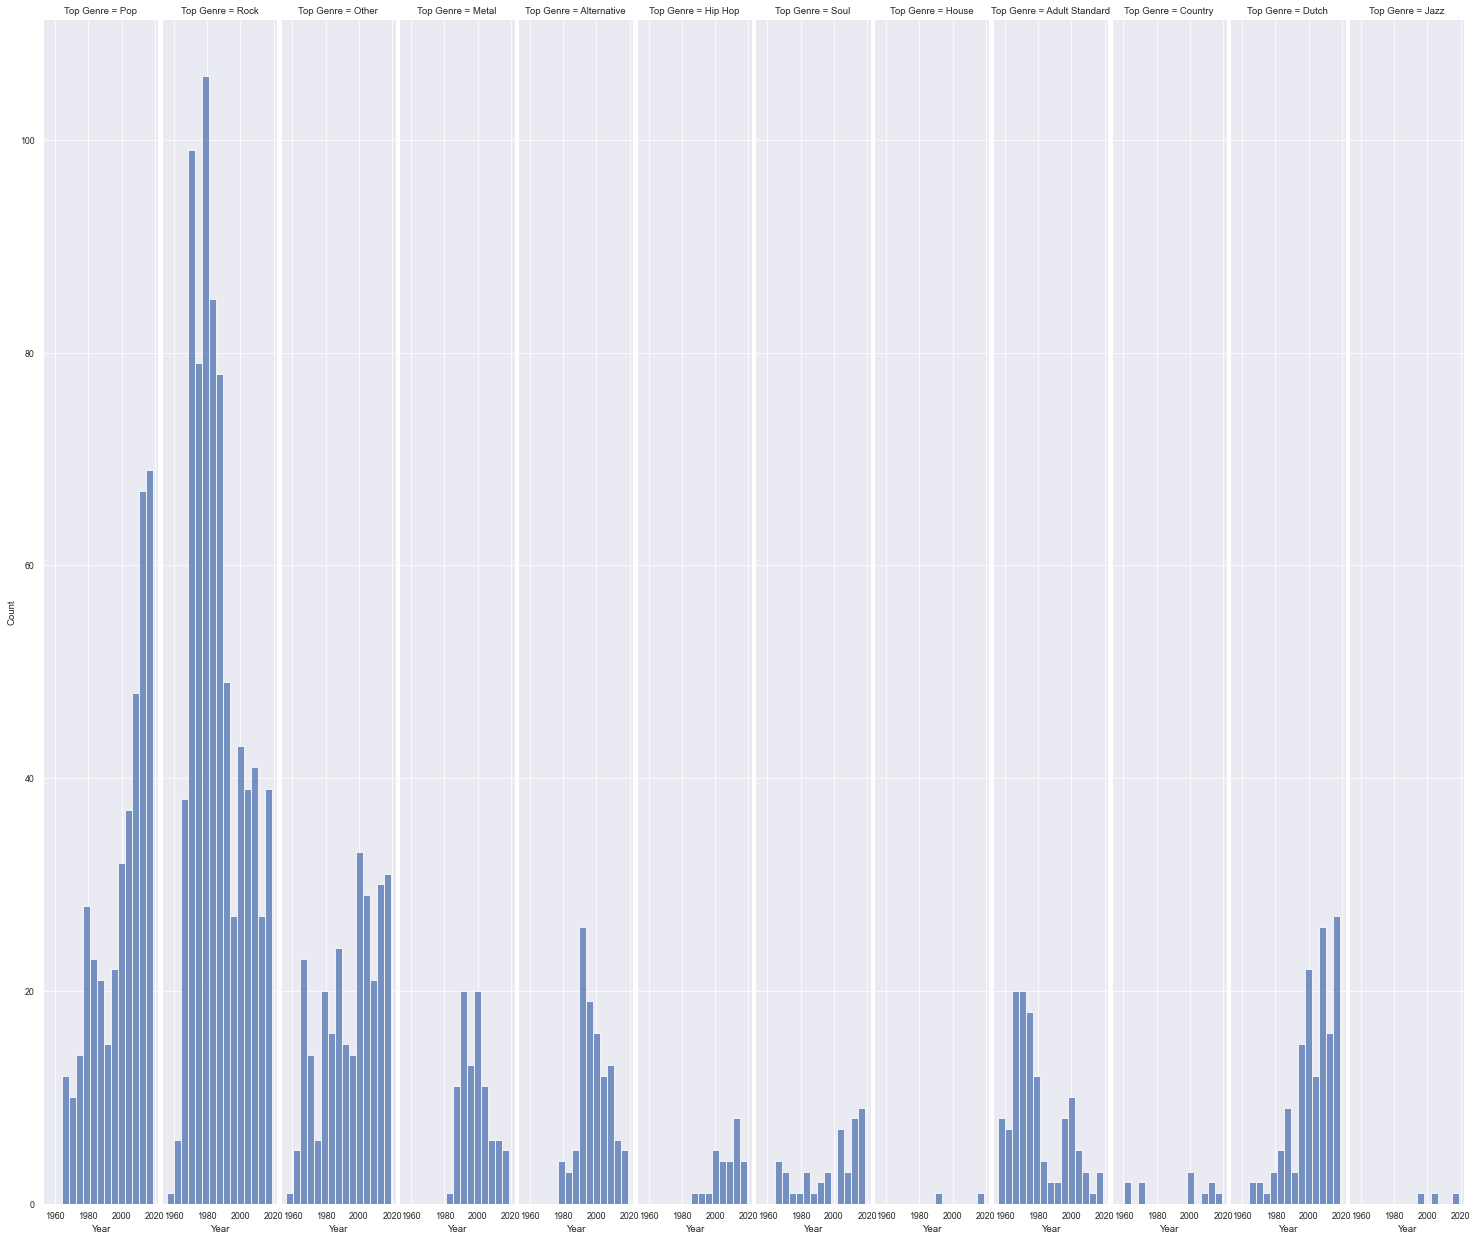

In [174]:
#First I will find each genres density by year on a general comparison to find genres of specific years.
#Although this is not age ranges of listeners, when these genres exploded, says something about demographic
years=sns.displot(data=main(),x='Year',col='Top Genre')
years.fig.set_figwidth(20)
years.fig.set_figheight(20)
#its very small but from this I can extract decades from which the songs would be most popular. 
#For purpose of time Im only exploring the most popular of these so i will not explore: Jazz,other,house,dutch, or country

In [ ]:
#I WILL NOW CONDUCT THE RESEARCH OF EACH GENRE POPULARITY

<AxesSubplot:xlabel='Year', ylabel='Popularity'>

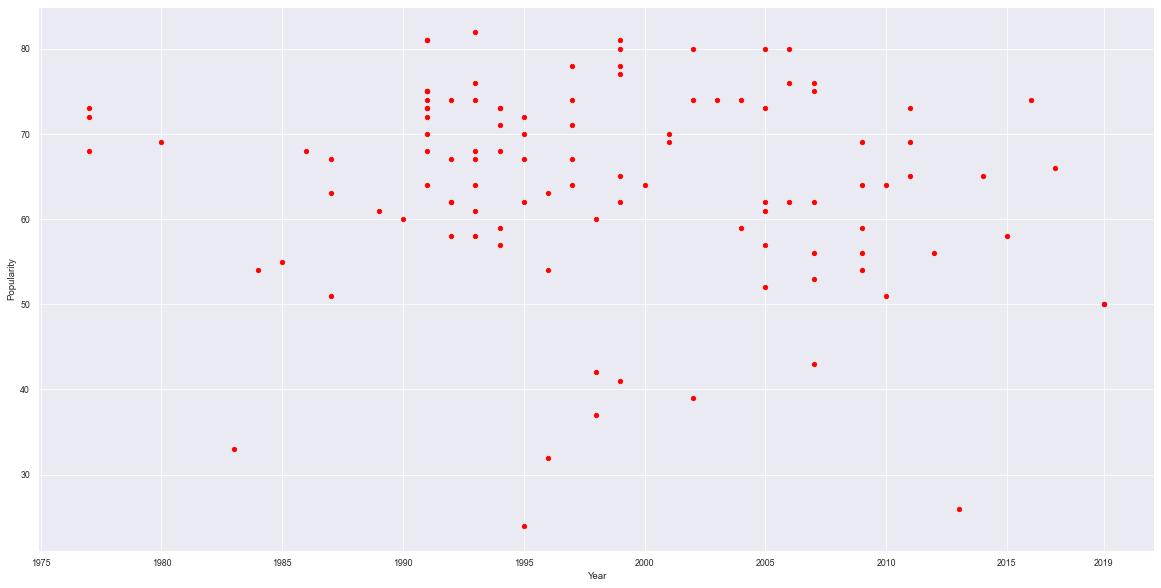

In [170]:
alt.plot(x='Year',y='Popularity',figsize=(20,10),kind='scatter',color='red',xticks=[1975,1980,1985,1990,1995,2000,2005,2010,2015,2019])

<AxesSubplot:xlabel='Year', ylabel='Popularity'>

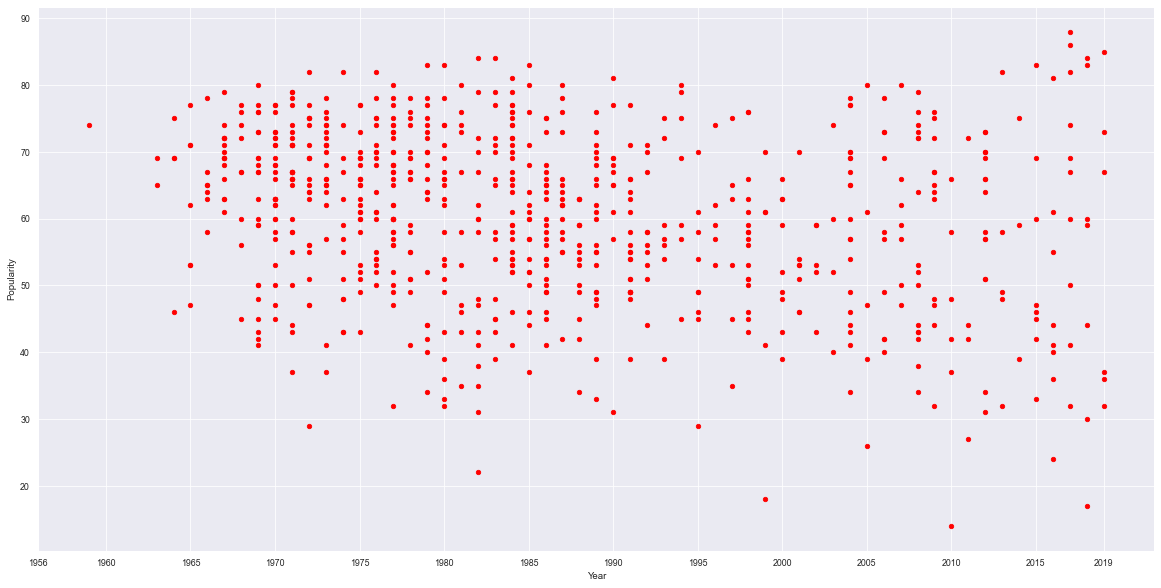

In [191]:
rock.plot(x='Year',y='Popularity',figsize=(20,10),kind='scatter',color='red',xticks=[1956,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2019])

<AxesSubplot:xlabel='Year', ylabel='Popularity'>

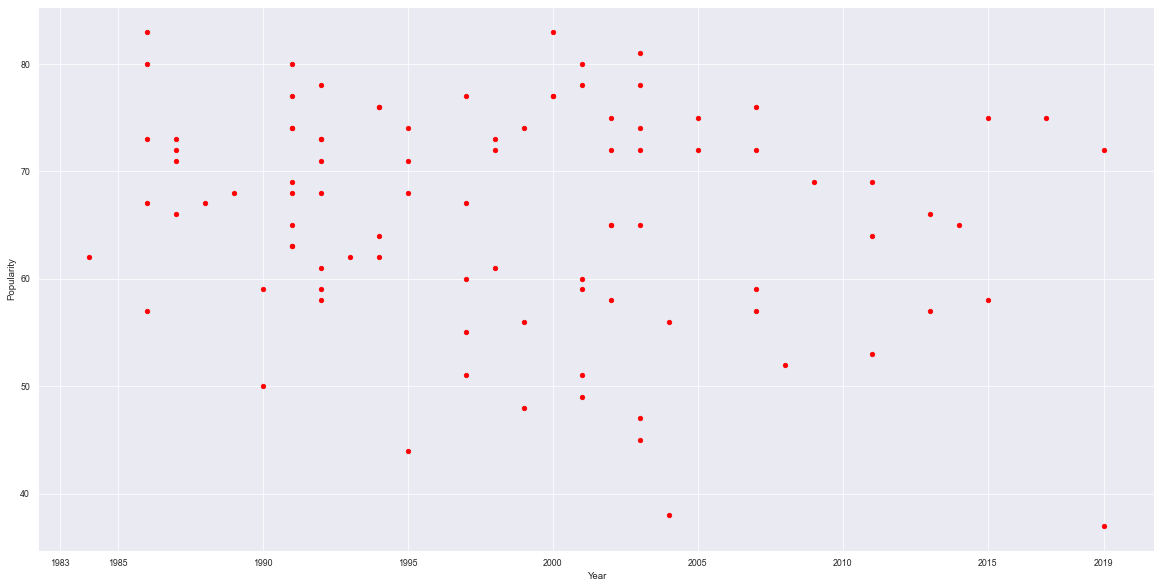

In [188]:
met.plot(x='Year',y='Popularity',figsize=(20,10),kind='scatter',color='red',xticks=[1983,1985,1990,1995,2000,2005,2010,2015,2019])

<AxesSubplot:xlabel='Year', ylabel='Popularity'>

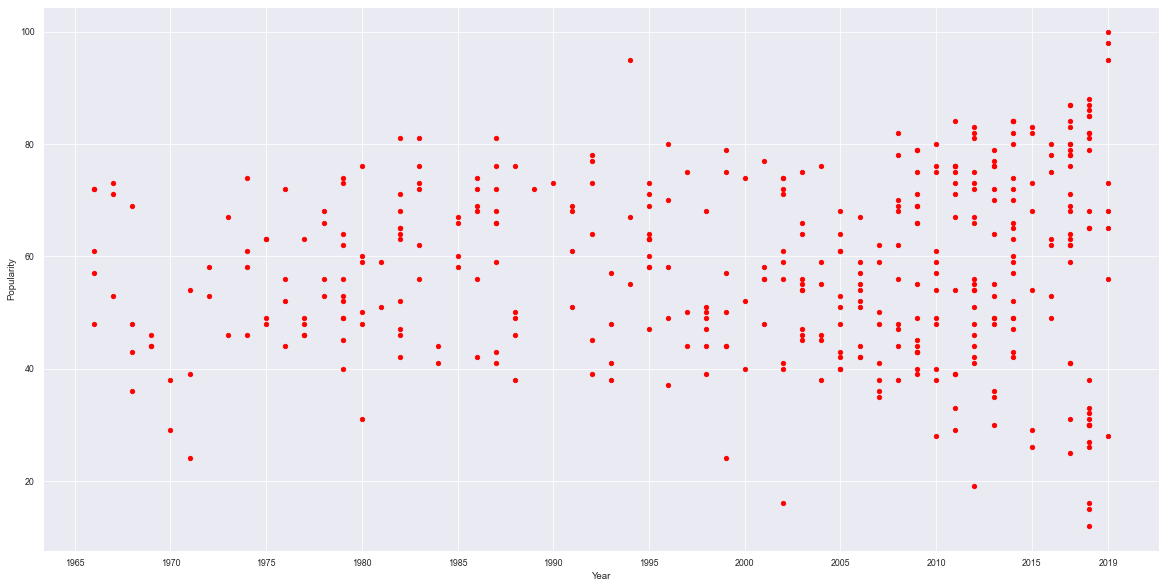

In [182]:
pop.plot(x='Year',y='Popularity',figsize=(20,10),kind='scatter',color='red',xticks=[1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2019])

<AxesSubplot:xlabel='Year', ylabel='Popularity'>

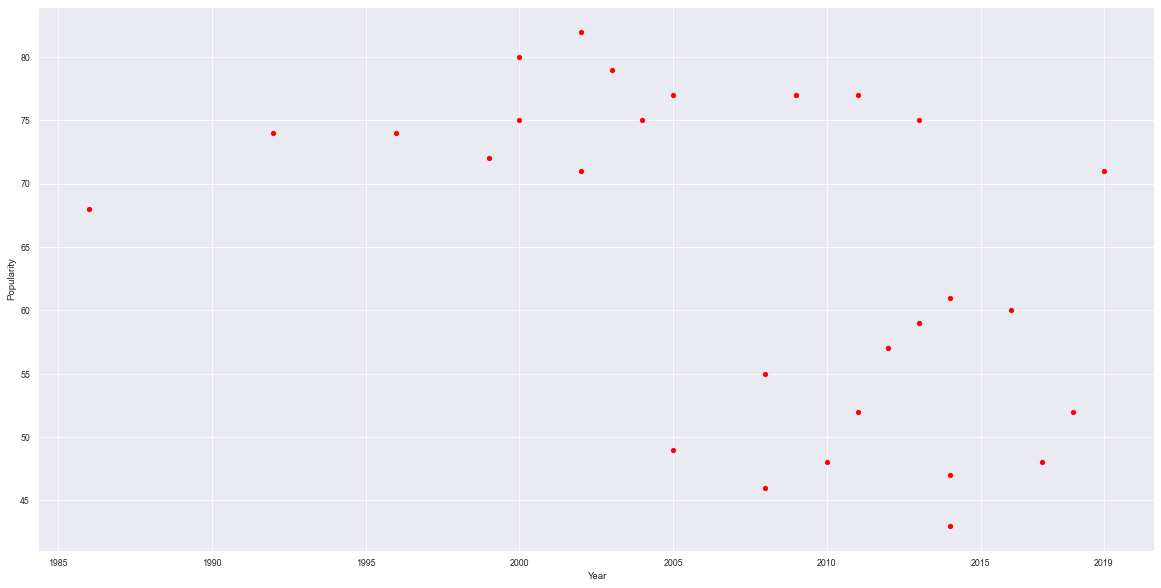

In [179]:
hip.plot(x='Year',y='Popularity',figsize=(20,10),kind='scatter',color='red',xticks=[1985,1990,1995,2000,2005,2010,2015,2019])

<AxesSubplot:xlabel='Year', ylabel='Popularity'>

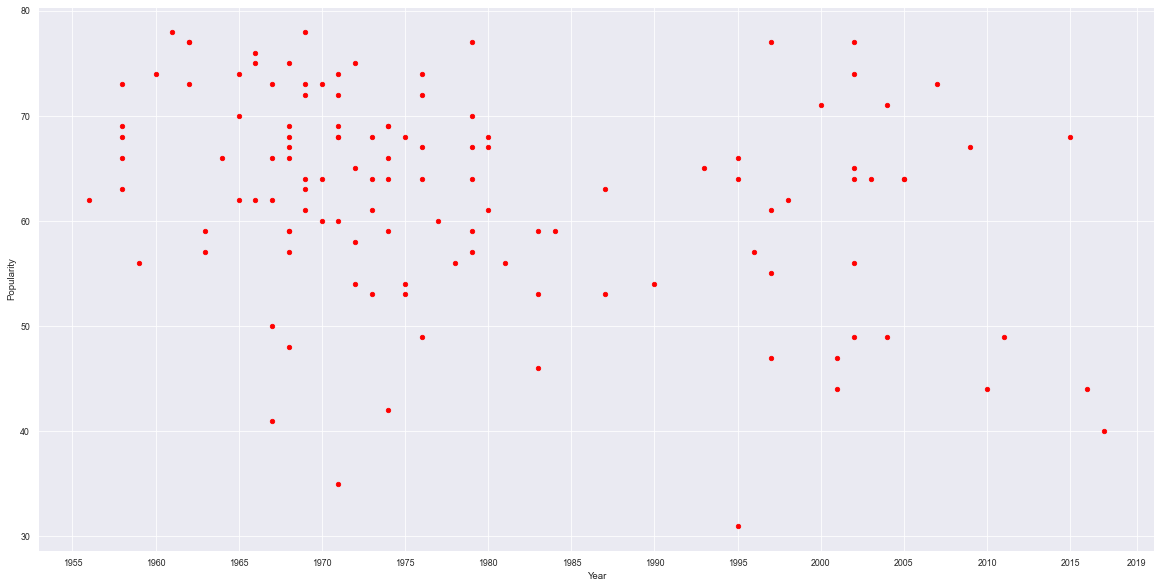

In [177]:
adu.plot(x='Year',y='Popularity',figsize=(20,10),kind='scatter',color='red',xticks=[1955,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2019])

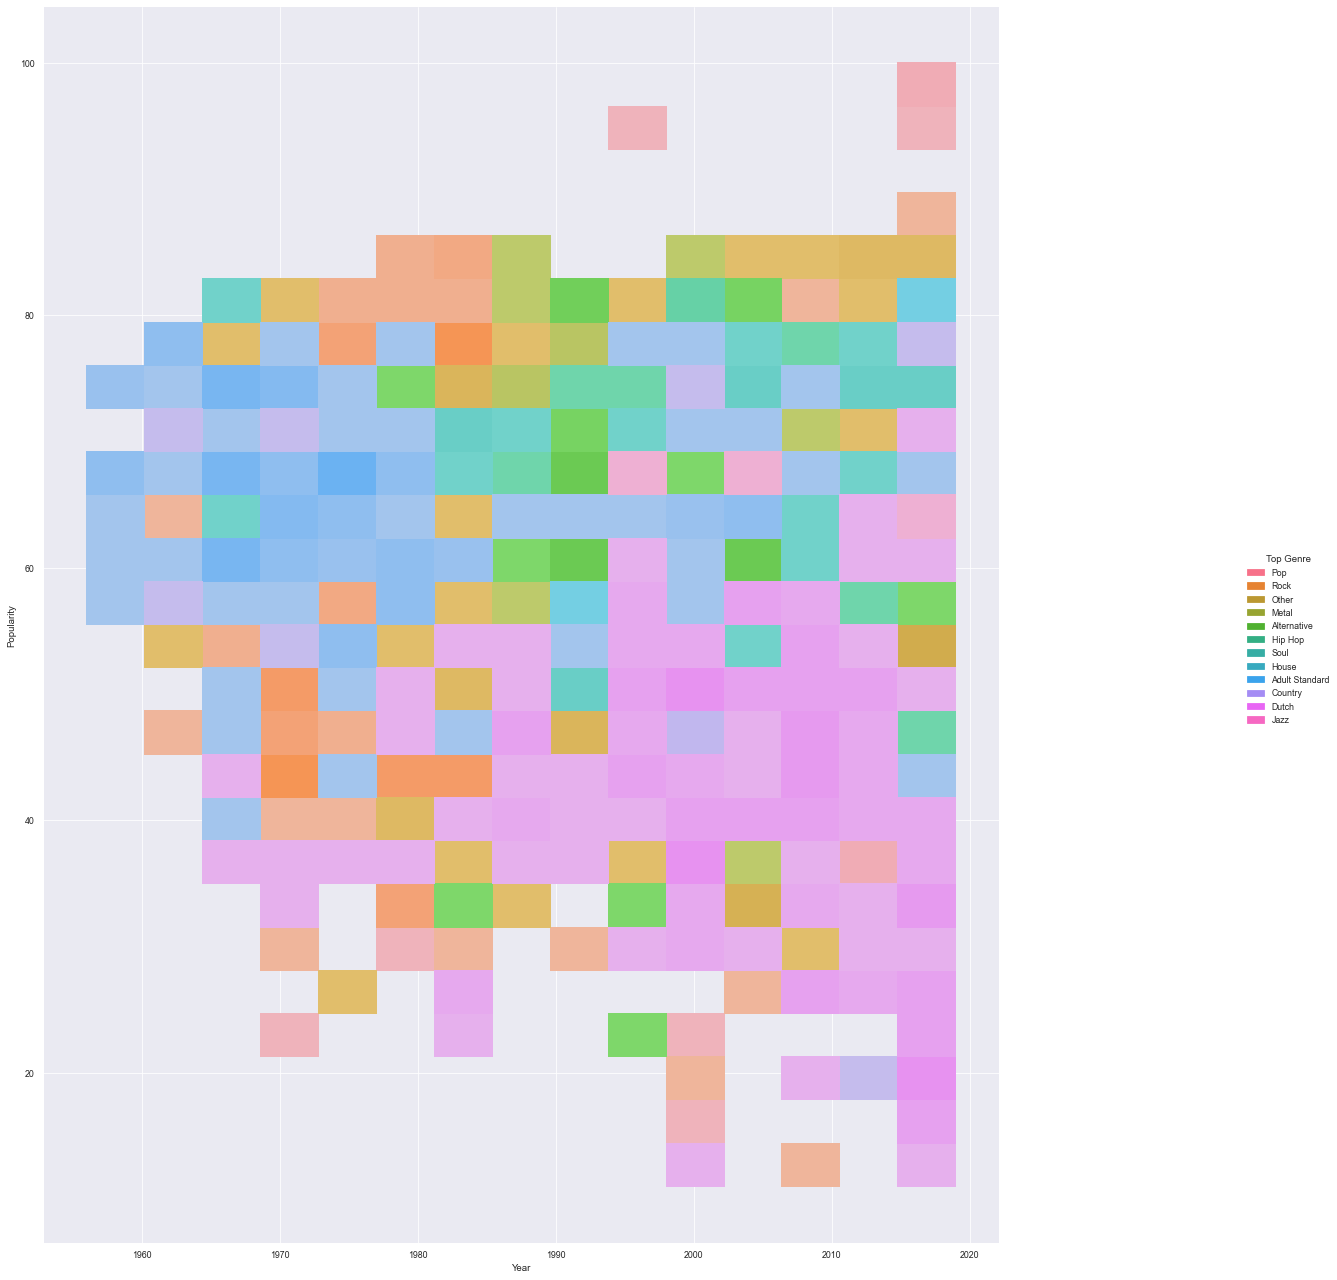

In [205]:
#so this plot acts as an overlay of my whole thing. Most popular genres to least in a clustered overlay 
years=sns.displot(data=main(),x='Year',y='Popularity',hue='Top Genre')
years.fig.set_figwidth(20)
years.fig.set_figheight(20)

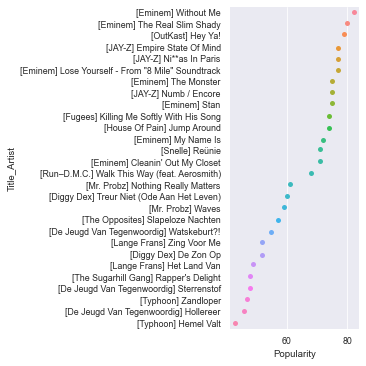

In [213]:
sns.catplot(data=hip,x='Popularity',y='Title_Artist')

In [ ]:
#RESEARCH QUESTION 2: Do the Top Songs in each Genre have A similar trait that makes them so popular?

In [ ]:
#RAN OUT OF TIME FOR THE MILESTONE 3 HOWEVER ITS EASY TO PUT INTO MY DASHBOARD AND SHOW